# Convolutional  Neural Network

# 1. Convolutional Neural Networks model : Step by step

In [3]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [22]:
# load dataset

def load_dataset():

    train_dataset = h5py.File('datasets/04 - signs/train_signs.h5','r')
    test_dataset = h5py.File('datasets/04 - signs/test_signs.h5','r')

    x_train = np.array(train_dataset["train_set_x"])
    y_train = np.array(train_dataset["train_set_y"])

    x_test = np.array(test_dataset["test_set_x"])
    y_test = np.array(test_dataset["test_set_y"])

    classes = np.array(test_dataset["list_classes"])

    return x_train, y_train, x_test, y_test

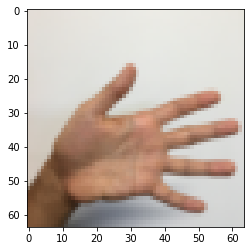

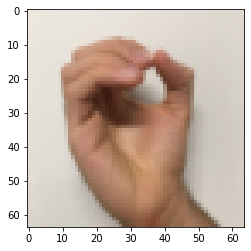

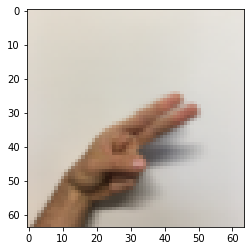

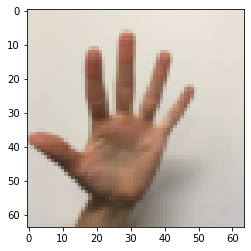

In [24]:
# get data
X_train, y_train, X_test, y_test = load_dataset()

for i in range(4):
    plt.figure()
    plt.imshow(X_train[i])
    plt.show()
    


A convolution layer transforms an input volume into an output volume of different size, as shown below.


<center><img src="images/11-CNN/conv_nn.png" style="width:350px;height:200px;"></center>

## 1.1 Convolutional Neural Networks

### 1.1.1 Zero-Padding

<center><img src="images/11-CNN/PAD.png" style="width:600px;height:400px;"></center>

Zero-padding adds zeros around the border of an image. The main benefits of padding are:

- Use a Convolution Layer without necessarily shrinking the height and wifht of the volumes. This is important for building deeper networks, since otherwise the height and width would shrink as we go to deeper layers.

- It help to keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels at the edges of an image.

(4, 4)
(4, 6)


Text(0.5, 1.0, 'a pad 2')

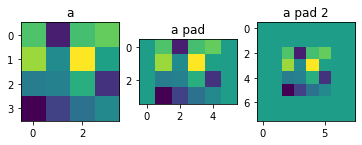

In [32]:
# pad examples

a = np.random.randn(4,4)
b = np.pad(a,((0,0),(1,1)))
c = np.pad(a,((2,2),(2,2)))

print(a.shape)
print(b.shape)

fig,ax = plt.subplots(1,3)

ax[0].imshow(a[:])
ax[0].set_title('a')

ax[1].imshow(b[:])
ax[1].set_title('a pad')

ax[2].imshow(c[:])
ax[2].set_title('a pad 2')

In [ ]:
def zero_pad(X,pad):
    """
    X -- array of shape (m,n_H, n_W, n_C). m images of shape (n_H,n_W,n_C)
    pad -- integer, amount of padding around each image
    """

### 1.1.2 Single step of convolution